<h1 style="color:blue;">Unit 13: Predictive Analytics: Training and Testing Models</h1>


This section introduces the predictive analytics technique of splitting data into random subsets for **training and testing** a predictive model. In order to perform unbiased assessment of the classification model. This is illustrated for ROC analysis where the sensitivities and specificities of the training model are estimated from the held out testing data. 

### Training/Testing for unbiased sensitivity/specificity analysis

Thus far, we have considered examples in which the sensitivy, specificity and ROC curves are calculated on the same data as used for model development. In other words, they are applied to the same data as used for training. This tends to produce optimistic estimates of the error probabilities and adjustment is needed. The situation is analogous to the degree of freedom adjustments in computing the error variance in linear regression.

A general approach to this problem is to randomly subdivide the available data into two subsets: 


+ **Training data:** These data will be used for model building only and not for predictive assessment.


+ **Test data:** These data will not be used for model building; they will only be used for predictive assessment.


This general approach requires that we have enough data that the subsets are large enough to provide adequate power. The general approach will be applied to logistic regression classification here, and applied later to other predictive analytics approaches.

**Python libraries:**

    statsmodels.api, statsmodels.formula.api, scikit-learn

If you need to install these on your computer enter the following commands from a terminal or anaconda window:

    conda install scikit-learn
    conda install -c conda-forge statsmodels
 


<h1 style="color:blue;"><u>Topic 1</u>: The Problem with Overfitting a Dataset</h1>

Let's go back to our Pew research dataset. We would like to formulate a logistic regression model with a response variable of support for the border wall with the following explanatory variables:
1. age
2. number of people that live in the household

Note that these are two numerical explanatory variables. We will do the following.
1. Visualize these three variables.
2. Fit the logistic regression model with these variables.
3. Visualize what some possible classification thresholds might look like in our plot.
4. Determine what we might think is the "ideal" classification threshold for this dataset.

In [15]:
import numpy as np
import pandas as pd
from scipy.stats import bernoulli, norm

In [16]:
import zipfile as zp

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


Bad key "text.kerning_factor" on line 4 in
C:\Users\vme3\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [32]:
from sklearn.datasets import make_blobs

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smff

#### First, let's generate a simulated dataset of two spherical "blobs" in 2-d space. We can think of the 2-d coordinates (ie. [x1,x2]) of the blobs as our explanatory variables. And we can think of the "blob" that a given coordinate belongs to as a categorical response variable (ie. y).

In [50]:
centers = [[1, 1], [-1, -1]]
X, Y = make_blobs(n_samples=200, centers=centers, cluster_std=0.65, random_state=1002)

In [53]:
df_sim=pd.DataFrame(X, columns=['x1','x2'])
df_sim['y']=Y
df_sim.head()

,x1,x2,y
0,-0.926162,-0.754580,1
1,1.732075,1.260998,0
2,-1.938930,0.153444,1
3,1.141271,0.770950,0
4,-1.073213,-1.636586,1


#### Next, let's visualize the three variables we just created.

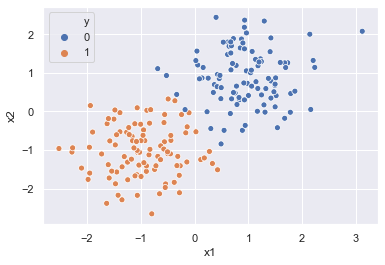

In [52]:
sns.scatterplot(x="x1", y="x2", hue='y', data=df_sim)
plt.show()

#### Next, let's fit a logistic regression model wit this data.

In [54]:
mod = smf.logit('y ~ x1 + x2', data=df_sim).fit()
mod.summary()

Optimization terminated successfully.
         Current function value: 0.010163
         Iterations 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                            2
Date:                Sun, 15 Nov 2020   Pseudo R-squ.:                  0.9853
Time:                        17:27:42   Log-Likelihood:                -2.0326
converged:                       True   LL-Null:                       -138.63
Covariance Type:            nonrobust   LLR p-value:                 4.751e-60
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.4276      5.042     -1.076      0.282     -15.310       4.454
x1           -40.5445     36.510     -1.111      0.267    -112.102      31.013
x2           -26.3874     26.811     -0.984      0.325     -78.935      26.160
==============================================================================

Possibly complete quasi-separation: A fraction 0.94 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### Write out the logistic regression model.
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


#### Suppose we were to select a probability threshold $p_0$ in which any predicted probability over  $p_0$  (for a given [x1,x2] value) would be classified as being in blob y=1, and otherwise would be classifided as being in blob y=0. What would be the shape of the curve (in our plot above) that marks this threshold?

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>



In [61]:
part_of_intercept=5.4277/-26.3874
part_of_intercept

-0.20569286856605803

In [62]:
slope=40.5445/-26.3874
slope

-1.5365098493978187

#### Use the scatterplot to estimate what a good value of $p_0$ might be given that we would like to misclassifiy as few observations in the dataset as possible.

#### Threshold with p_0=0.5
How many misclassifications would we have with this threshold?
<br/>
<br/>
<br/>
<br/>
<br/>

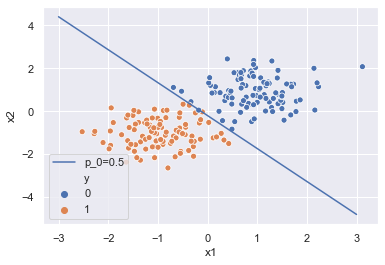

In [69]:
p_threshold=.5
x1=np.linspace(-3,3,100)
x2=np.log(p_threshold/(1-p_threshold))+part_of_intercept+slope*x1
sns.scatterplot(x="x1", y="x2", hue='y', data=df_sim)
plt.plot(x1,x2, label='p_0=%s'%p_threshold)
plt.legend()
plt.show()

#### Threshold with p_0=0.6
How many misclassifications would we have with this threshold?
<br/>
<br/>
<br/>
<br/>
<br/>

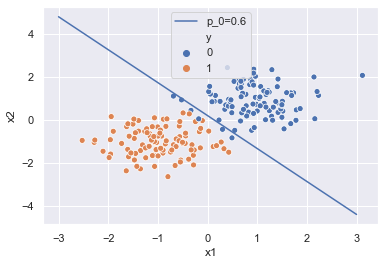

In [70]:
p_threshold=.6
x1=np.linspace(-3,3,100)
x2=np.log(p_threshold/(1-p_threshold))+part_of_intercept+slope*x1
sns.scatterplot(x="x1", y="x2", hue='y', data=df_sim)
plt.plot(x1,x2, label='p_0=%s'%p_threshold)
plt.legend()
plt.show()

#### Threshold with p_0=0.4
How many misclassifications would we have with this threshold?
<br/>
<br/>
<br/>
<br/>
<br/>

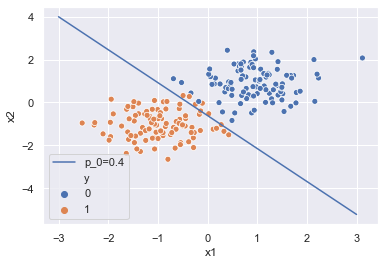

In [72]:
p_threshold=.4
x1=np.linspace(-3,3,100)
x2=np.log(p_threshold/(1-p_threshold))+part_of_intercept+slope*x1
sns.scatterplot(x="x1", y="x2", hue='y', data=df_sim)
plt.plot(x1,x2, label='p_0=%s'%p_threshold)
plt.legend()
plt.show()

#### What if we could fit a non-linear curve that PERFECTLY classified ALL points in this dataset? Would you trust that model to get 0% misclassifications with a NEW dataset that was generated from the same process?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


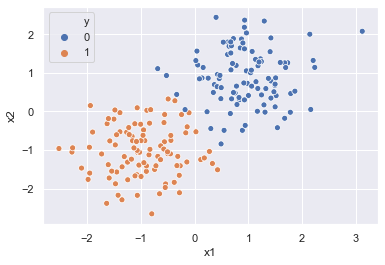

In [74]:
sns.scatterplot(x="x1", y="x2", hue='y', data=df_sim)
plt.show()

### "Training" an Analytics Model
We say that our model was **trained** on the dataset df_sim. This means that the observations in df_sim were used to find the optimal parameters $\hat{\beta}_0$, $\hat{\beta}_1$, and $\hat{\beta}_2$ that best fit the data in df_sim.

But is that how we want to assess the effectiveness of our model? Should we only assess it's effectiveness in terms of how well it fit the data that we already have answers (ie response variable values) for? Well, it depends on what you plan on USING the trained model for.

### Using vs. Training Predictive Analytics Models
Most predictive analytics models are **trained** with data in which have the response variable values for, but are **used** to make predictions for observations (ie explanatory variable values) in which we DON'T have the corresponding response variable values for.

### So how are we supposed assess how well our model *will* do with data that it was not trained with?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

<h1 style="color:blue;"><u>Topic 2</u>: Splitting a Dataset into Training Data and Testing Data </h1>

### (demonstrated with simulated data)

## First, let's randomly generate our ENTIRE dataset.
To illustrate the methods in a known context, we generate binary data from a logistic regression model. We import the functions needed to generate the simulated data. (We've used this simulated dataset in Units 11 and Unit 12 as well).

In [76]:
# set the coefficient values
b0, b1 = -0.7, 2.1 
# 
# set sample size
n = 400   
#
# generate exogenous variable
X = norm.rvs(size=n, random_state=1)   
odds = np.exp(b0 + b1*X)   # odds depend on x
#
# convert odds to probabilities and generate response y
y = bernoulli.rvs(p=odds/(1+odds), size=n, random_state=12347)
dat = pd.DataFrame({'X':X, 'y':y})
dat.head(10)

,X,y
0,1.624345,1
1,-0.611756,0
2,-0.528172,0
3,-1.072969,0
4,0.865408,1
5,-2.301539,0
6,1.744812,1
7,-0.761207,0
8,0.319039,0
9,-0.249370,0


## Next, we randomly split our dataset into into training datasets and test data sets.


### Training Dataset
* The **training dataset** will be used to build the model. The model parameter will be found for those that best fit this training dataset.

### Test Dataset
* The **test dataset** will be used to test the model. The model was not built with this dataset in mind. We will pretend that this is our new dataset that we wish to make predictions on. However, the nice thing is that we **do** have the response variable values for this test dataset. So the test dataset allows us to see how well our model did at predicting new observations (from the same data generating process) that it was NOT technically designed to fit.


Next we split the data into train and test data sets for modeling and evaluation. To do this we import several modules from sklearn.

In [77]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## How should we randomly split up the original dataset into the training and test dataset?
Here we specify that the training data should be 80% of the data, with 20% held out as testing data.

In [78]:
dat_train, dat_test = \
train_test_split(dat, test_size=0.20, random_state=123457)

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


#### Compare the shapes of the original, training and testing data frames:

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [79]:
dat.shape, dat_train.shape, dat_test.shape

((400, 2), (320, 2), (80, 2))

Here are the first few rows of the **training data**. Note that the data splitting is random, not systematic, so as to avoid any biases.

In [80]:
dat_train.head()

,X,y
303,-0.880578,0
273,0.884909,1
119,0.408901,1
60,-0.754398,0
121,-0.775162,0


Here are the first few rows of the **test data.**

In [81]:
dat_test.head()

,X,y
323,-0.826097,0
222,1.558806,1
11,-2.060141,0
346,-0.168199,1
223,0.109403,1


## Next, we train the model *just with our training dataset*.

In this simple setting, training the model simply means fitting the logistic regression model to **training data** only. 

In [84]:
mod_train = smf.logit('y ~ X', data=dat_train).fit()
mod_train.summary()

Optimization terminated successfully.
         Current function value: 0.417736
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  320
Model:                          Logit   Df Residuals:                      318
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Nov 2020   Pseudo R-squ.:                  0.3793
Time:                        18:24:35   Log-Likelihood:                -133.68
converged:                       True   LL-Null:                       -215.36
Covariance Type:            nonrobust   LLR p-value:                 2.070e-37
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8534      0.167     -5.121      0.000      -1.180      -0.527
X              2.4172      0.273      8.840      0.000       1.881       2.953
==============================================================================
"""

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

## Next, we test the model's ability to correctly classify the response variable values for the data in our *test dataset*.

#### To classify the data in the we first need to predict the predictive probabilities of the test data.
To evaluate the accuracy of the model as a classifier, we use the **training data model** to compute predictive probabilities for the **test data**. 

In [85]:
phat = mod_train.predict(exog=dict(X=dat_test['X'])) 
phat.head(10)

323    0.054672
222    0.948561
11     0.002920
346    0.220987
223    0.356884
139    0.322830
376    0.986799
12     0.163461
55     0.637519
171    0.790127
dtype: float64

#### Then we need to come up with a probaility threshold for our classifications.
Then we will compare the thresholded classifications based on test data $X$ variable only, to the actual responses $y$ in the test data. Here are the first 10 predictive probabilities.

To help visualize training versus testing, we plot the actual responses $y$ in the test set versus their predicted or estimated probabiliites based on the training model and their correpsonding $X$ values.

In [91]:
dat_test['y'].value_counts()

0    43
1    37
Name: y, dtype: int64

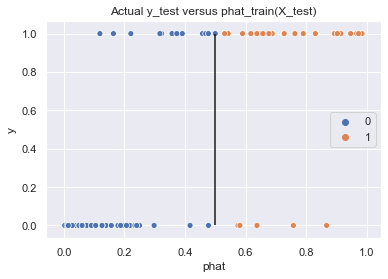

In [86]:
thresh = 0.5
sns.scatterplot(x=phat, y=dat_test['y'], hue=1*(phat > thresh))
plt.legend(loc='center right')
plt.xlabel('phat')
plt.vlines(x=thresh, ymin=0, ymax=1)
plt.title('Actual y_test versus phat_train(X_test)')
plt
plt.show()

#### Approximate the sensitivity and specificity using a probability threshold of $p_0=0.8$.

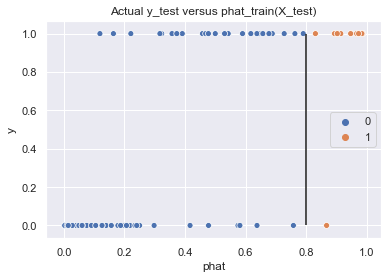

In [87]:
thresh = 0.8
sns.scatterplot(x=phat, y=dat_test['y'], hue=1*(phat > thresh))
plt.legend(loc='center right')
plt.xlabel('phat')
plt.vlines(x=thresh, ymin=0, ymax=1)
plt.title('Actual y_test versus phat_train(X_test)')
plt
plt.show()

#### Approximate the sensitivity and specificity using a probability threshold of $p_0=0.3$.

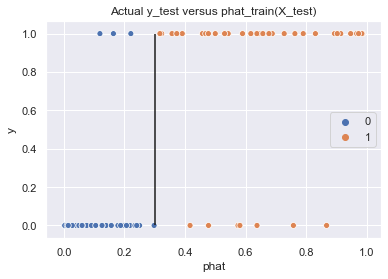

In [88]:
thresh = 0.3
sns.scatterplot(x=phat, y=dat_test['y'], hue=1*(phat > thresh))
plt.legend(loc='center right')
plt.xlabel('phat')
plt.vlines(x=thresh, ymin=0, ymax=1)
plt.title('Actual y_test versus phat_train(X_test)')
plt
plt.show()

#### To make this threshold selection process more efficient, let's create a function to compute sensitivity and specificity for a given threshold.

In [93]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [1]:
def senspec(y, score, thresh):
    yhat = 1*(score >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    sens = tp / (fn + tp)
    spec = tn / (fp + tn)
    return pd.DataFrame({'tn':[tn], 
                         'fp':[fp], 
                         'fn':[fn], 
                         'tp':[tp], 
                         'sens':[sens], 
                         'spec':[spec]})

#### *Test dataset* predictive statistics based on threshold=0.5:*

In [95]:
thresh=0.5
senspec(dat_test['y'], phat, thresh)

,tn,fp,fn,tp,sens,spec
0,38,5,12,25,0.675676,0.883721


#### *Training dataset* predictive statistics based on threshold=0.5:*
Comparison with naive training data results

In [15]:
senspec(dat_train['y'], mod_train.fittedvalues, thresh)

,tn,fp,fn,tp,sens,spec
0,175,17,46,82,0.640625,0.911458


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

#### *Test dataset* predictive statistics based on threshold 0.3

In [96]:
senspec(dat_test['y'], phat, 0.3)

,tn,fp,fn,tp,sens,spec
0,36,7,3,34,0.918919,0.837209


In this example using 0.3 gives considerably higher sensitivity at a small cost in specificity.

### ROC curve for *test data*

In [98]:
fpr, tpr, score = roc_curve(y_true=dat_test['y'], y_score=phat)
auc = roc_auc_score(y_true=dat_test['y'], y_score=phat)

In [103]:
print('Log Odds Thresholds')
print(score)
print()
print('Probability Thresholds')
p_thresholds=np.exp(score)/(1+np.exp(score))
print(p_thresholds)
print()
print('False Positive Rates (ie 1-specificities)')
print(fpr)
print()
print('True Positive Rates (ie. sensitivities)')
print(tpr)

Log Odds Thresholds
[1.98679862e+00 9.86798621e-01 8.93329617e-01 8.67243263e-01
 7.62676681e-01 7.57644094e-01 6.46240024e-01 6.37519031e-01
 5.89748807e-01 5.74713529e-01 4.99670495e-01 4.77411972e-01
 4.57581740e-01 4.16487440e-01 3.16936410e-01 2.34482872e-01
 2.20986936e-01 1.78288527e-01 1.63461249e-01 1.25863743e-01
 1.18949344e-01 1.63157198e-03]

Probability Thresholds
[0.87940404 0.72845513 0.70957681 0.70417175 0.68193459 0.68084202
 0.65616266 0.65419242 0.64330751 0.63985008 0.62238189 0.61713656
 0.61244034 0.60264242 0.57857745 0.5583536  0.55502299 0.54445444
 0.54077456 0.53142446 0.52970232 0.50040789]

False Positive Rates (ie 1-specificities)
[0.         0.         0.         0.02325581 0.02325581 0.04651163
 0.04651163 0.06976744 0.06976744 0.11627907 0.11627907 0.13953488
 0.13953488 0.1627907  0.1627907  0.25581395 0.25581395 0.37209302
 0.37209302 0.48837209 0.48837209 1.        ]

True Positive Rates (ie. sensitivities)
[0.         0.02702703 0.32432432 0.32432

In [18]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

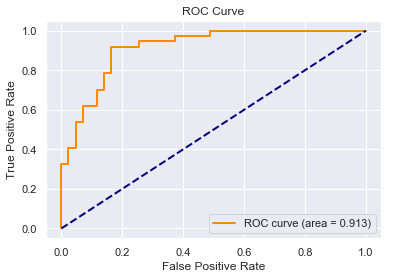

In [19]:
plot_roc(fpr, tpr, auc)

### Evaluation of the Performance of this Trained Model on the Test Results
1. **Overall Performance for all Possible Thresholds**: The AUC performance (0.913) is high. 
2. **Selecting a Good Threshold using the ROC Curve**: If we were to select a threshold minimizing distance to the upper left corner, the ROC curve suggests that it may be possible to achieve:
    - a **sensitivity** (= true positive rate) of around 0.92 and 
    - a **specifity** (= 1 - false positive rate) of around 0.84.

We can see that $p_0=0.3$ aligns with these ideal combinations of sensitivity and specificity.

In [20]:
senspec(dat_test['y'], phat, 0.30)

,tn,fp,fn,tp,sens,spec
0,36,7,3,34,0.918919,0.837209


<h1 style="color:blue;"><u>Topic 3</u>: Pew Dataset Training a Predictive Model with Training Data and Testing it With Test Data </h1>


#### Preprocessing:

In [104]:
import zipfile as zp

In [105]:
zf = zp.ZipFile('Feb17-public.zip')
missing_values = ["NaN", "nan", "Don't know/Refused (VOL.)"]
df = pd.read_csv(zf.open('Feb17public.csv'),
                 na_values=missing_values)[['age', 'sex', \
                                            'q52', 'party']]

In [106]:
# reduce q52 responses to two categories and 
# create binary reponse variable
df['q52'][df['q52']!='Favor'] = 'Not_favor'
df['y'] = df['q52'].map({'Not_favor':0,'Favor':1})
#
# use cleaned data without records that have missing values
dfclean = df.dropna()
dfclean.head()

,age,sex,q52,party,y
0,80.0,Female,Not_favor,Independent,0
1,70.0,Female,Not_favor,Democrat,0
2,69.0,Female,Not_favor,Independent,0
3,50.0,Male,Favor,Republican,1
4,70.0,Female,Not_favor,Democrat,0


## 1. Split the data into training datasets (randomly selected 80% of observations from Pew dataset) and test data set (remaining 20% of observations from Pew dataset)

In [24]:
df_train, df_test = train_test_split(dfclean, 
                                   test_size=0.20, 
                                   random_state=1)

In [25]:
display("Training data", df_train.shape, df_train.head(),\
        "Testing data", df_test.shape, df_test.head())

'Training data'

(1172, 5)

,age,sex,q52,party,y
49,86.0,Male,Favor,Independent,1
1075,69.0,Female,Not_favor,Democrat,0
102,63.0,Male,Favor,Republican,1
1296,19.0,Male,Not_favor,Independent,0
338,60.0,Male,Not_favor,Democrat,0


'Testing data'

(293, 5)

,age,sex,q52,party,y
1032,50.0,Male,Not_favor,Democrat,0
671,40.0,Female,Not_favor,Republican,0
639,27.0,Male,Not_favor,Independent,0
943,43.0,Male,Not_favor,Independent,0
882,20.0,Male,Favor,No preference (VOL.),1


## 2. Fit the model to training data only.

In [26]:
pewmod = smf.logit('y ~ party + age + sex',\
    data=df_train).fit()
pewmod.summary()

Optimization terminated successfully.
         Current function value: 0.454704
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1172
Model:                          Logit   Df Residuals:                     1165
Method:                           MLE   Df Model:                            6
Date:                Wed, 15 Apr 2020   Pseudo R-squ.:                  0.2818
Time:                        11:28:41   Log-Likelihood:                -532.91
converged:                       True   LL-Null:                       -742.00
                                        LLR p-value:                 3.438e-87
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -3.7460      0.324    -11.564      0.000      -4.381      -3.111
party[T.Independent]              1.8242      0.223      8.173      0.000       1.387       2.262
party[T.No preference (VOL.)]     1.8553      0.415      4.475      0.000       1.043       2.668
party[T.Other party (VOL.)]       2.1395      1.249      1.713      0.087      -0.308       4.587
party[T.Republican]               3.7061      0.239     15.537      0.000       3.239       4.174
sex[T.Male]                       0.4678      0.155      3.015      0.003       0.164       0.772
age                               0.0170      0.004      3.860      0.000       0.008       0.026
=================================================================================================
"""

## 3. Get the predictive probabilities for the test data.

The predict function uses the fitted model to extract any exogenous variables it needs from the test data. We do not have to specify which variables. We just provide the whole test data frame. Compare the following two code cells and results.

In [27]:
# predictive probabilities - explicit method
phat_test = pewmod.predict(exog=df_test[['age', 'sex', 'party']])
phat_test.head(10)

1032    0.080907
671     0.654430
639     0.269731
943     0.326381
882     0.252808
1228    0.079654
1179    0.288219
591     0.077712
550     0.413034
443     0.654430
dtype: float64

In [28]:
# predictive probabilities - implicit method
phat_test = pewmod.predict(exog=df_test)
phat_test.head(10)

1032    0.080907
671     0.654430
639     0.269731
943     0.326381
882     0.252808
1228    0.079654
1179    0.288219
591     0.077712
550     0.413034
443     0.654430
dtype: float64

## 4a Evaluation: 
### 4a Test data sensitivity and specificity for a few values of $p_0$

In [29]:
# Using a probability threshold of 0.5
senspec(df_test['y'], phat_test, 0.5)

,tn,fp,fn,tp,sens,spec
0,162,16,50,65,0.565217,0.910112


In [30]:
# Using a probability threshold of 0.33
senspec(df_test['y'], phat_test, 0.3)

,tn,fp,fn,tp,sens,spec
0,128,50,29,86,0.747826,0.719101


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/><br/>
<br/>
<br/>

### 4b Test data ROC curve

In [31]:
fpr_pew, tpr_pew, score_pew = roc_curve(y_true=df_test['y'], y_score=phat_test)
auc_pew = roc_auc_score(y_true=df_test['y'], y_score=phat_test)

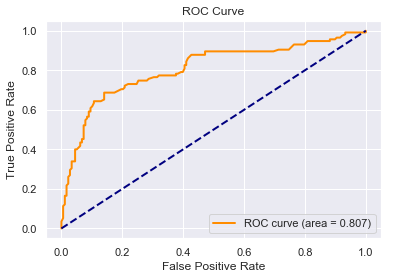

In [32]:
plot_roc(fpr_pew, tpr_pew, auc_pew)

For comparison, here is the naive ROC curve for the training data

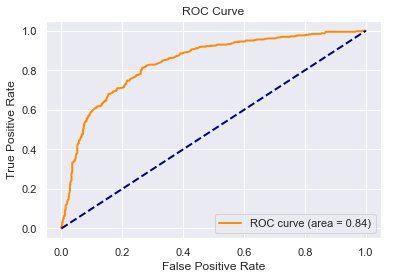

In [33]:
fpr_pew0, tpr_pew0, score_pew0 = roc_curve(y_true=df_train['y'], y_score=pewmod.fittedvalues)
auc_pew0 = roc_auc_score(y_true=df_train['y'], y_score=pewmod.fittedvalues)
plot_roc(fpr_pew0, tpr_pew0, auc_pew0)

In this example the training data AUC = 0.84, which is optimistic compared with unbiased test data AUC of 0.81.

---
STAT 207, Victoria Ellison and Douglas Simpson, University of Illinois at Urbana-Champaign